In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
import folium

In [2]:
DJ_add_missing=pd.read_excel('add_missing_daejeon_price_data.xlsx')

DJ_add_missing

,시간,품목,조사기준,동,가격
0,2014-07-01,감귤,100g 정도 10개,가오동,12500.000000
1,2014-08-01,감귤,100g 정도 10개,가오동,12333.333333
2,2014-09-01,감귤,100g 정도 10개,가오동,11300.000000
3,2014-10-01,감귤,100g 정도 10개,가오동,10600.000000
4,2014-11-01,감귤,100g 정도 10개,가오동,8900.000000
...,...,...,...,...,...
91975,2024-08-01,화장지,크리넥스 35mⅹ24롤(백색),회덕동,24900.000000
91976,2024-09-01,화장지,크리넥스 35mⅹ24롤(백색),회덕동,24900.000000
91977,2024-10-01,화장지,크리넥스 35mⅹ24롤(백색),회덕동,24900.000000
91978,2024-11-01,화장지,크리넥스 35mⅹ24롤(백색),회덕동,24900.000000


In [3]:
DJ_add_missing.columns

Index(['시간', '품목', '조사기준', '동', '가격'], dtype='object')

In [4]:
DJ_add_missing['품목'].unique()

array(['감귤', '감자', '고추가루', '기타', '김', '깐마늘', '달걀', '대파', '동태', '돼지고기',
       '두부', '라면', '맥주', '멸치', '무', '밀가루', '밤', '배', '배추', '분말커피', '분유',
       '빵', '사과', '생닭', '설탕', '세제', '소주', '쇠고기', '식용유', '쌀', '양파',
       '오징어(냉동)', '우유', '조기', '참기름', '청주', '콩', '콩나물', '화장지'],
      dtype=object)

In [7]:
# '사과' 데이터 필터링
df_apple = DJ_add_missing[DJ_add_missing["품목"] == "사과"].copy()

# 시간 순 정렬
df_apple["시간"] = pd.to_datetime(df_apple["시간"])  # 시간 컬럼을 날짜 타입으로 변환
df_apple = df_apple.sort_values(by=["동", "시간"])

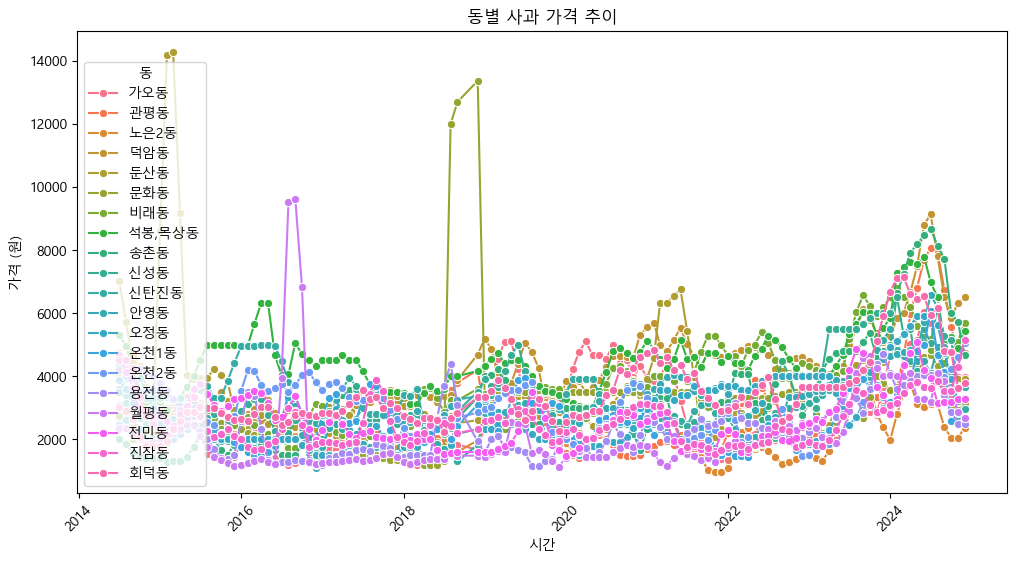

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_apple, x="시간", y="가격", hue="동", marker="o")
plt.xticks(rotation=45)
plt.title("동별 사과 가격 추이")
plt.ylabel("가격 (원)")
plt.xlabel("시간")
plt.legend(title="동")
plt.show()

In [9]:
# 이상치 탐지 함수 (IQR 방식)
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # 1사분위수 (25%)
    Q3 = data.quantile(0.75)  # 3사분위수 (75%)
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)  # 이상치 조건 반환

# 동별 이상치 탐지
df_apple["이상치"] = df_apple.groupby("동")["가격"].transform(detect_outliers_iqr)

# 이상치 데이터 출력
outliers = df_apple[df_apple["이상치"]]
print(outliers)

              시간  품목           조사기준    동           가격   이상치
7205  2024-04-01  사과  부사 400g1개, 중품  관평동  5973.388889  True
7206  2024-05-01  사과  부사 400g1개, 중품  관평동  6812.555556  True
7207  2024-06-01  사과  부사 400g1개, 중품  관평동  7686.722222  True
7208  2024-07-01  사과  부사 400g1개, 중품  관평동  8067.833333  True
7209  2024-08-01  사과  부사 400g1개, 중품  관평동  7922.444444  True
...          ...  ..            ...  ...          ...   ...
89987 2024-04-01  사과  부사 400g1개, 중품  회덕동  6612.801040  True
89988 2024-05-01  사과  부사 400g1개, 중품  회덕동  6454.524517  True
89989 2024-06-01  사과  부사 400g1개, 중품  회덕동  6542.352345  True
89990 2024-07-01  사과  부사 400g1개, 중품  회덕동  5945.274479  True
89991 2024-08-01  사과  부사 400g1개, 중품  회덕동  6158.210052  True

[80 rows x 6 columns]


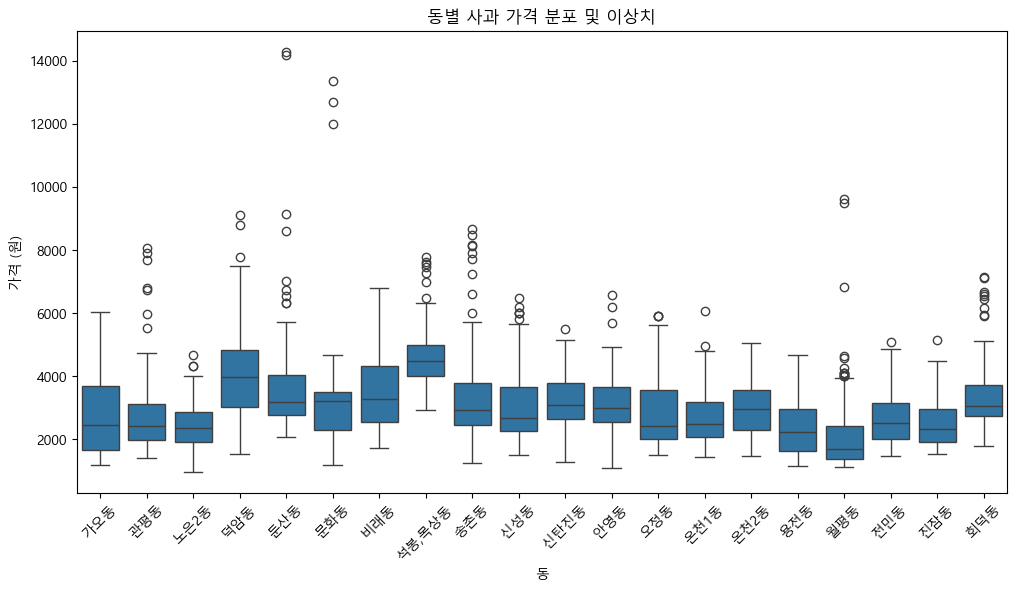

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_apple, x="동", y="가격")
plt.xticks(rotation=45)
plt.title("동별 사과 가격 분포 및 이상치")
plt.ylabel("가격 (원)")
plt.xlabel("동")
plt.show()

In [11]:
# 2024년 데이터만 필터링하여 이상치 탐지
df_apple_2024 = df_apple[df_apple["시간"].dt.year == 2024]

# 이상치 탐지 함수 (IQR 방식)
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # 1사분위수 (25%)
    Q3 = data.quantile(0.75)  # 3사분위수 (75%)
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)  # 이상치 조건 반환

# 동별 이상치 탐지 (2024년 데이터에 대해서만 적용)
df_apple_2024["이상치"] = df_apple_2024.groupby("동")["가격"].transform(detect_outliers_iqr)

# 2024년 이상치 데이터 출력
outliers_2024 = df_apple_2024[df_apple_2024["이상치"]]
print(outliers_2024)

              시간  품목           조사기준     동           가격   이상치
48603 2024-11-01  사과  부사 400g1개, 중품  신탄진동  2730.000000  True
48604 2024-12-01  사과  부사 400g1개, 중품  신탄진동  2970.000000  True
53198 2024-07-01  사과  부사 400g1개, 중품   안영동  6577.666667  True
66999 2024-11-01  사과  부사 400g1개, 중품  온천2동  4625.000000  True
67000 2024-12-01  사과  부사 400g1개, 중품  온천2동  5057.500000  True
85396 2024-12-01  사과  부사 400g1개, 중품   진잠동  5150.000000  True


C:\Users\user\AppData\Local\Temp\ipykernel_19904\410016967.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apple_2024["이상치"] = df_apple_2024.groupby("동")["가격"].transform(detect_outliers_iqr)


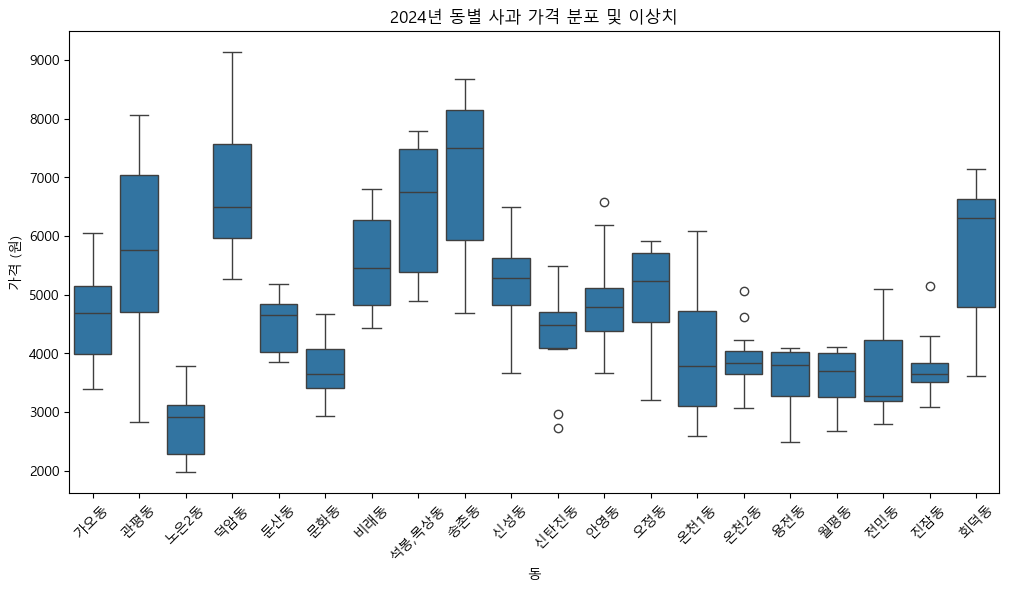

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_apple_2024, x="동", y="가격")
plt.xticks(rotation=45)
plt.title("2024년 동별 사과 가격 분포 및 이상치")
plt.ylabel("가격 (원)")
plt.xlabel("동")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19904\2884849478.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # X축 레이블 회전
C:\Users\user\AppData\Local\Temp\ipykernel_19904\2884849478.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # X축 레이블 회전
C:\Users\user\AppData\Local\Temp\ipykernel_19904\2884849478.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # X축 레이블 회전
C:\Users\user\AppData\Local\Temp\ipykernel_19904\2884849478.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using

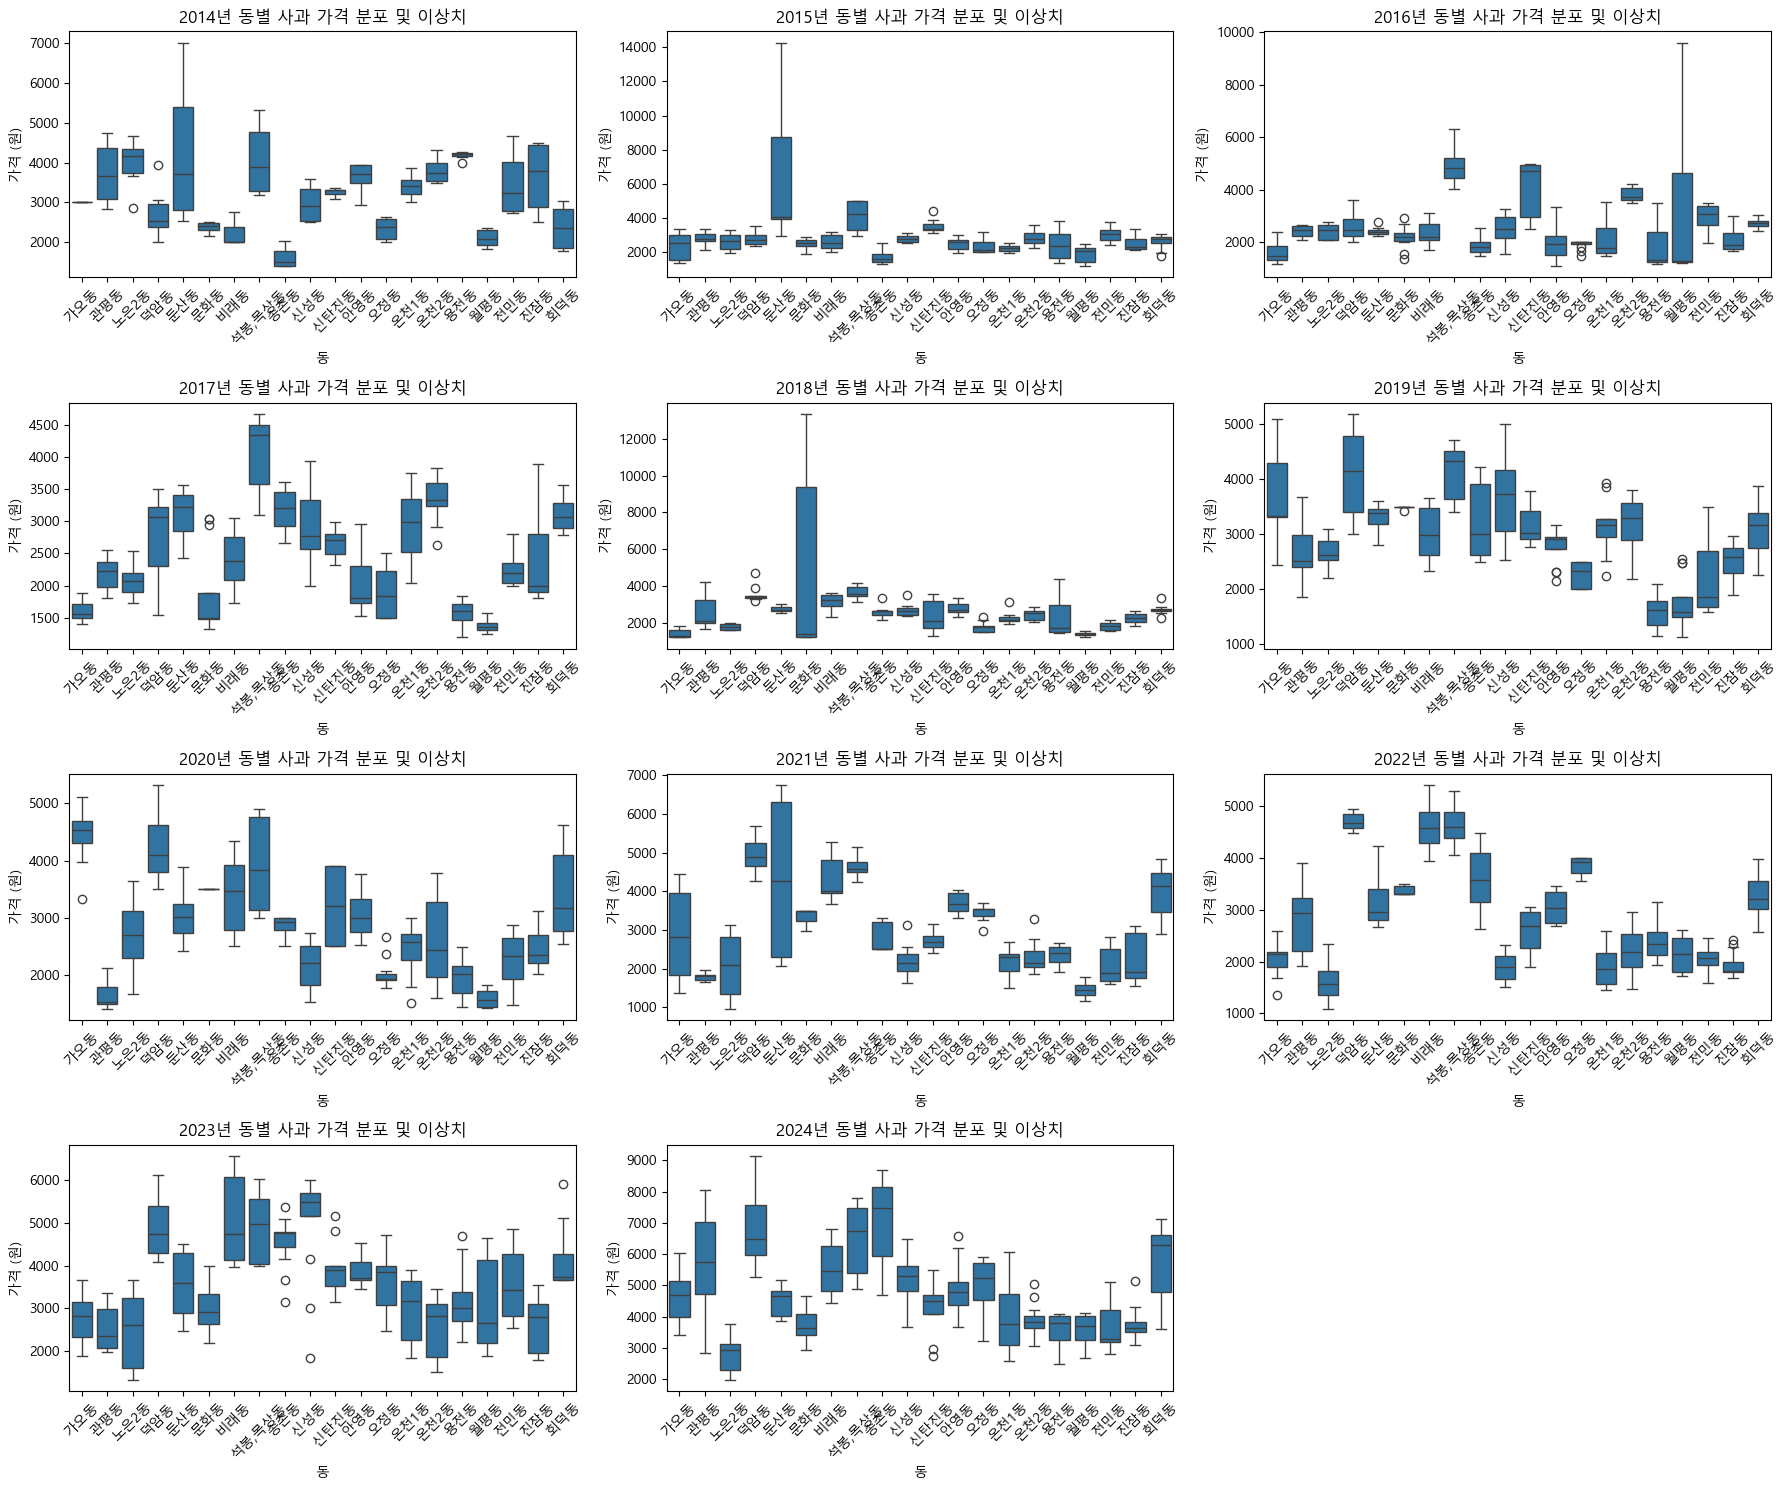

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연도 리스트 생성 (2014~2024)
years = sorted(df_apple["시간"].dt.year.unique())

# 서브플롯 설정 (11개년 데이터를 4x3 그리드로 시각화)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 15))  # 4x3 서브플롯 (1개는 공백)
axes = axes.flatten()  # 2D 배열을 1D로 변환 (서브플롯 쉽게 접근)

for i, year in enumerate(years):
    df_year = df_apple[df_apple["시간"].dt.year == year]  # 해당 연도 데이터 필터링
    sns.boxplot(data=df_year, x="동", y="가격", ax=axes[i])  # 연도별 Boxplot 생성
    axes[i].set_title(f"{year}년 동별 사과 가격 분포 및 이상치")  # 제목 설정
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # X축 레이블 회전
    axes[i].set_xlabel("동")  # X축 이름
    axes[i].set_ylabel("가격 (원)")  # Y축 이름

# 빈 서브플롯 제거 (데이터 11개라 12번째 플롯은 공백)
fig.delaxes(axes[-1])

plt.tight_layout()  # 서브플롯 간 간격 조정
plt.show()


In [17]:
import pandas as pd

# '사과' 데이터 필터링
df_apple = DJ_add_missing[DJ_add_missing["품목"] == "사과"].copy()

# 연도별 데이터 개수 계산
df_apple["연도"] = df_apple["시간"].dt.year  # '시간' 컬럼에서 연도 추출
yearly_counts = df_apple.groupby("연도")["가격"].count().reset_index()
yearly_counts.columns = ["연도", "사과 데이터 개수"]

# 결과 출력
print(yearly_counts)

# 테이블 형태로 보기 좋게 출력 (Jupyter 환경에서)
from IPython.display import display
display(yearly_counts)

      연도  사과 데이터 개수
0   2014        120
1   2015        240
2   2016        240
3   2017        240
4   2018        200
5   2019        240
6   2020        240
7   2021        240
8   2022        240
9   2023        240
10  2024        240


,연도,사과 데이터 개수
0,2014,120
1,2015,240
2,2016,240
3,2017,240
4,2018,200
5,2019,240
6,2020,240
7,2021,240
8,2022,240
9,2023,240


In [24]:
import pandas as pd

# 2014~2016년 데이터 필터링
df_apple_2014_2015 = df_apple[df_apple["시간"].dt.year.isin([2014, 2015, 2016])].copy()

# 이상치 탐지 함수 (IQR 방식)
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # 1사분위수 (25%)
    Q3 = data.quantile(0.75)  # 3사분위수 (75%)
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)  # 이상치 조건 반환

# 동별 이상치 탐지 (2014~2016년 데이터에 대해서만 적용)
df_apple_2014_2015["이상치"] = df_apple_2014_2015.groupby("동")["가격"].transform(detect_outliers_iqr)

# 2014~2015년 이상치 데이터 출력
outliers_2014_2016 = df_apple_2014_2015[df_apple_2014_2015["이상치"]]

# 결과 출력
print(outliers_2014_2016)

              시간  품목           조사기준     동            가격    연도   이상치
7090  2014-07-01  사과  부사 400g1개, 중품   관평동   4750.000000  2014  True
7091  2014-08-01  사과  부사 400g1개, 중품   관평동   4500.000000  2014  True
7092  2014-09-01  사과  부사 400g1개, 중품   관평동   4000.000000  2014  True
11691 2014-09-01  사과  부사 400g1개, 중품  노은2동   4666.666667  2014  True
16288 2014-07-01  사과  부사 400g1개, 중품   덕암동   3945.000000  2014  True
20887 2014-07-01  사과  부사 400g1개, 중품   둔산동   7016.666667  2014  True
20893 2015-01-01  사과  부사 400g1개, 중품   둔산동   8594.777778  2015  True
20894 2015-02-01  사과  부사 400g1개, 중품   둔산동  14176.666667  2015  True
20895 2015-03-01  사과  부사 400g1개, 중품   둔산동  14285.555556  2015  True
20896 2015-04-01  사과  부사 400g1개, 중품   둔산동   9163.333333  2015  True
25514 2016-11-01  사과  부사 400g1개, 중품   문화동   1550.000000  2016  True
25515 2016-12-01  사과  부사 400g1개, 중품   문화동   1366.666667  2016  True
43911 2016-12-01  사과  부사 400g1개, 중품   신성동   1566.666667  2016  True
57688 2015-04-01  사과  부사 400g1개, 중품   오정동   2833

In [31]:
# 2017~2019년 데이터 필터링
df_apple_2017_2019 = df_apple[df_apple["시간"].dt.year.isin([2017, 2018, 2019])].copy()

# 이상치 탐지 함수 (IQR 방식)
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # 1사분위수 (25%)
    Q3 = data.quantile(0.75)  # 3사분위수 (75%)
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)  # 이상치 조건 반환

# 동별 이상치 탐지 (2017~2019년 데이터에 대해서만 적용)
df_apple_2017_2019["이상치"] = df_apple_2017_2019.groupby("동")["가격"].transform(detect_outliers_iqr)

# 2017~2019년 이상치 데이터 출력
outliers_2017_2019 = df_apple_2017_2019[df_apple_2017_2019["이상치"]]

# 결과 출력
print(outliers_2017_2019)

              시간  품목           조사기준     동            가격    연도   이상치
7139  2018-08-01  사과  부사 400g1개, 중품   관평동   3547.555556  2018  True
7140  2018-09-01  사과  부사 400g1개, 중품   관평동   3797.500000  2018  True
7141  2018-12-01  사과  부사 400g1개, 중품   관평동   4198.277778  2018  True
7149  2019-08-01  사과  부사 400g1개, 중품   관평동   3500.000000  2019  True
7150  2019-09-01  사과  부사 400g1개, 중품   관평동   3683.333333  2019  True
16318 2017-01-01  사과  부사 400g1개, 중품   덕암동   1540.749337  2017  True
16340 2019-01-01  사과  부사 400g1개, 중품   덕암동   5192.047377  2019  True
16346 2019-07-01  사과  부사 400g1개, 중품   덕암동   5063.577879  2019  True
25535 2018-08-01  사과  부사 400g1개, 중품   문화동  12000.000000  2018  True
25536 2018-09-01  사과  부사 400g1개, 중품   문화동  12700.000000  2018  True
25537 2018-12-01  사과  부사 400g1개, 중품   문화동  13366.666667  2018  True
48530 2018-08-01  사과  부사 400g1개, 중품  신탄진동   1490.962430  2018  True
48531 2018-09-01  사과  부사 400g1개, 중품  신탄진동   1297.629097  2018  True
71523 2018-06-01  사과  부사 400g1개, 중품   용전동   2663

In [30]:
# 2020~2022년 데이터 필터링
df_apple_2020_2022 = df_apple[df_apple["시간"].dt.year.isin([2020, 2021, 2022])].copy()

# 이상치 탐지 함수 (IQR 방식)
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # 1사분위수 (25%)
    Q3 = data.quantile(0.75)  # 3사분위수 (75%)
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)  # 이상치 조건 반환

# 동별 이상치 탐지 (2020~2022년 데이터에 대해서만 적용)
df_apple_2020_2022["이상치"] = df_apple_2020_2022.groupby("동")["가격"].transform(detect_outliers_iqr)

# 2020~2022년 이상치 데이터 출력
outliers_2020_2022 = df_apple_2020_2022[df_apple_2020_2022["이상치"]]

# 결과 출력
print(outliers_2020_2022)

              시간  품목           조사기준       동           가격    연도   이상치
7180  2022-03-01  사과  부사 400g1개, 중품     관평동  3156.000000  2022  True
7181  2022-04-01  사과  부사 400g1개, 중품     관평동  3100.166667  2022  True
7182  2022-05-01  사과  부사 400g1개, 중품     관평동  3890.166667  2022  True
7183  2022-06-01  사과  부사 400g1개, 중품     관평동  3622.500000  2022  True
7184  2022-07-01  사과  부사 400g1개, 중품     관평동  3247.166667  2022  True
7185  2022-08-01  사과  부사 400g1개, 중품     관평동  3223.555556  2022  True
16352 2020-01-01  사과  부사 400g1개, 중품     덕암동  3833.333333  2020  True
16353 2020-02-01  사과  부사 400g1개, 중품     덕암동  3666.666667  2020  True
16354 2020-03-01  사과  부사 400g1개, 중품     덕암동  3833.333333  2020  True
16355 2020-04-01  사과  부사 400g1개, 중품     덕암동  3500.000000  2020  True
16356 2020-05-01  사과  부사 400g1개, 중품     덕암동  3666.666667  2020  True
16357 2020-06-01  사과  부사 400g1개, 중품     덕암동  3883.666667  2020  True
16364 2021-01-01  사과  부사 400g1개, 중품     덕암동  5546.333333  2021  True
16365 2021-02-01  사과  부사 400g1개, 중

In [29]:
# 2023~2024년 데이터 필터링
df_apple_2023_2024 = df_apple[df_apple["시간"].dt.year.isin([2023, 2024])].copy()

# 이상치 탐지 함수 (IQR 방식)
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # 1사분위수 (25%)
    Q3 = data.quantile(0.75)  # 3사분위수 (75%)
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)  # 이상치 조건 반환

# 동별 이상치 탐지 (2020~2022년 데이터에 대해서만 적용)
df_apple_2023_2024["이상치"] = df_apple_2023_2024.groupby("동")["가격"].transform(detect_outliers_iqr)

# 2023~2024년 이상치 데이터 출력
outliers_2023_2024 = df_apple_2023_2024[df_apple_2023_2024["이상치"]]

# 결과 출력
print(outliers_2023_2024)

              시간  품목           조사기준     동           가격    연도   이상치
16406 2024-07-01  사과  부사 400g1개, 중품   덕암동  9133.333333  2024  True
43982 2023-01-01  사과  부사 400g1개, 중품   신성동  1833.333333  2023  True
43983 2023-02-01  사과  부사 400g1개, 중품   신성동  3000.000000  2023  True
53198 2024-07-01  사과  부사 400g1개, 중품   안영동  6577.666667  2024  True
62396 2024-07-01  사과  부사 400g1개, 중품  온천1동  6084.000000  2024  True
85396 2024-12-01  사과  부사 400g1개, 중품   진잠동  5150.000000  2024  True


C:\Users\user\AppData\Local\Temp\ipykernel_19904\2617626357.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # X축 레이블 회전
C:\Users\user\AppData\Local\Temp\ipykernel_19904\2617626357.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # X축 레이블 회전
C:\Users\user\AppData\Local\Temp\ipykernel_19904\2617626357.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # X축 레이블 회전
C:\Users\user\AppData\Local\Temp\ipykernel_19904\2617626357.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using

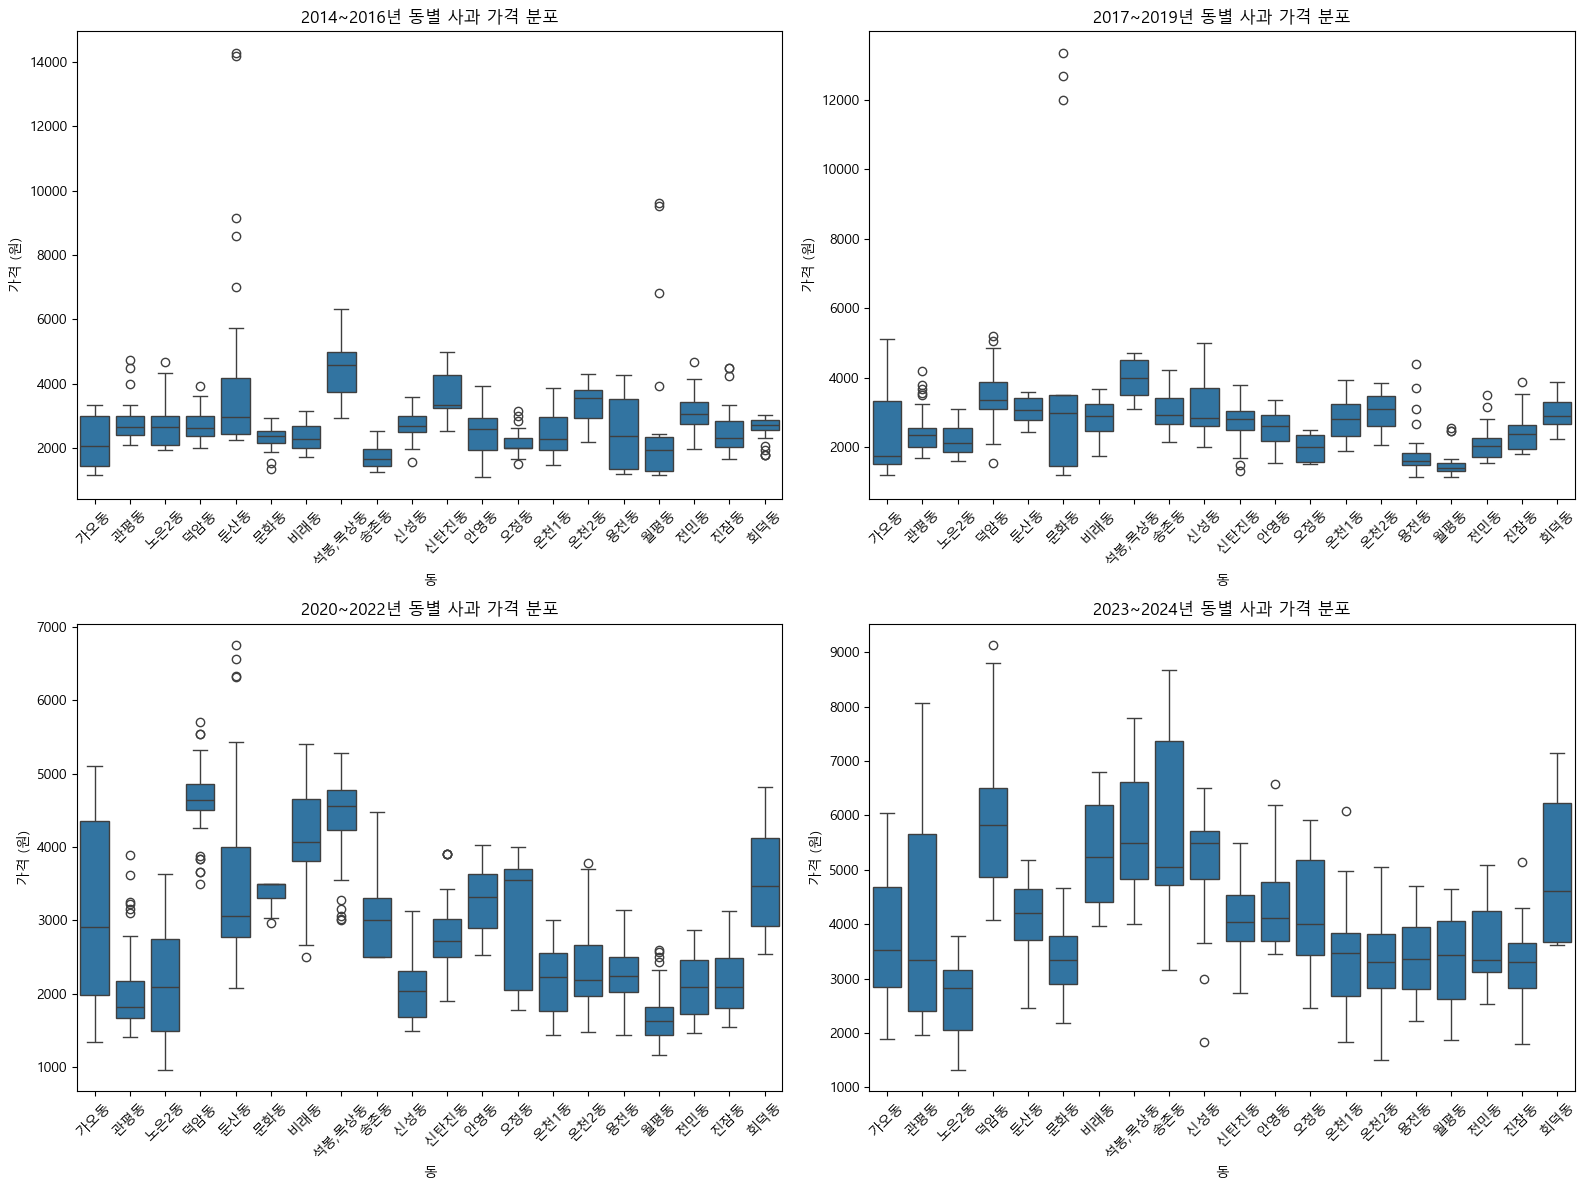

In [19]:
# 연도 그룹 정의
year_ranges = [(2014, 2016), (2017, 2019), (2020, 2022), (2023, 2024)]

# 서브플롯 설정 (2x2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()  # 2D 배열을 1D로 변환

for i, (start, end) in enumerate(year_ranges):
    df_range = df_apple[(df_apple["시간"].dt.year >= start) & (df_apple["시간"].dt.year <= end)]
    
    sns.boxplot(data=df_range, x="동", y="가격", ax=axes[i])
    axes[i].set_title(f"{start}~{end}년 동별 사과 가격 분포")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # X축 레이블 회전
    axes[i].set_xlabel("동")
    axes[i].set_ylabel("가격 (원)")

plt.tight_layout()  # 서브플롯 간 간격 조정
plt.show()